In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import codecs
from scipy import spatial
from sklearn.manifold import TSNE
import time

In [2]:
import clean_text as ct
import clean_text2 as ct2

In [3]:
data_set = pd.read_csv('./covid_dataset_csv.csv')

In [14]:
embeddings_dict = {}

In [15]:
with open("./glove.6B.50d.txt", 'r', encoding="utf-8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], "float32")
        embeddings_dict[word] = vector

In [16]:
def find_closest_embeddings(embedding):
    return sorted(embeddings_dict.keys(), key=lambda word: spatial.distance.euclidean(embeddings_dict[word], embedding))

In [17]:
lambda word: spatial.distance.euclidean(embeddings_dict[word], embedding)

<function __main__.<lambda>(word)>

In [4]:
def read_data(file_name):
    with open(file_name,'r',encoding='utf8') as f:
        word_vocab = set() # not using list to avoid duplicate entry
        word2vector = {}
        for line in f:
            line_ = line.strip() #Remove white space
            words_Vec = line_.split()
            word_vocab.add(words_Vec[0])
            word2vector[words_Vec[0]] = np.array(words_Vec[1:],dtype=float)
    print("Total Words in DataSet:",len(word_vocab))
    return word_vocab,word2vector

In [5]:
vocab, w2v = read_data("./glove.6B.50d.txt")
w2v['covid'] = w2v['coronavirus']

Total Words in DataSet: 400000


In [6]:
print(type(w2v))
w2v['covid'] = w2v['coronavirus']
w2v['covid-19'] = w2v['coronavirus']
w2v['covid19'] = w2v['coronavirus']
w2v['corona virus'] = w2v['coronavirus']

<class 'dict'>


In [8]:
print(type(vocab))

<class 'set'>


In [7]:
def cos_sim(u,v):
    numerator_ = u.dot(v)
    denominator_= np.sqrt(np.sum(np.square(u))) * np.sqrt(np.sum(np.square(v)))
    return numerator_/denominator_

In [7]:
print(len(w2v))

400004


In [8]:
def cos_sim(u,v):
    numerator = u.dot(v)
    denominator= np.sqrt(np.sum(np.square(u))) * np.sqrt(np.sum(np.square(v)))
    return numerator/denominator
def overall_similarity(q1,data_set):
    similarity=[]
    q1_clean = [ct2.getClearReview(i) for i in [q1]][0].split()
    for i in range(data_set.shape[0]):
        q2 = data_set.iloc[i]['0']
#         print(q2)
        q2_clean = [ct2.getClearReview(i) for i in [q2]][0].split()
        ans = 0;
        for w1 in q1_clean:
            max1_ = 0
            for w2 in q2_clean:
                if w2 not in vocab:
                    continue
                sim1 = cos_sim(w2v[w1],w2v[w2])
                max1_ = max(sim1,max1_)
            ans += max1_
        similarity.append(ans/len(q1_clean))
    return similarity
def overall_similarity0(q1,data_set):
    similarity=[]
    q1_clean = [ct2.getClearReview(i) for i in [q1]][0].split()
    for i in range(data_set.shape[0]):
        q2 = data_set.iloc[i]['0']
#         print(q2)
        q2_clean = [ct2.getClearReview(i) for i in [q2]][0].split()
        ans = 0;
        for w1 in q1_clean:
            max1_ = 0
            for w2 in q2_clean:
                if w2 not in vocab:
                    continue
                sim1 = cos_sim(w2v[w1],w2v[w2])
                max1_ = max(sim1,max1_)
            ans += max1_
        similarity.append(ans/len(q1_clean))
    return similarity
# def overall_similarity(q1,data_set):
#     similarity0 = overall_similarity0(q1,data_set)
#     similarity1 = overall_similarity1(q1,data_set)
#     similarity = np.array(similarity0)+np.array(similarity1)
#     print(similarity0.shape)
#     print(similarity1.shape)
#     print(similarity.shape)
#     similarity = list(similarity)
#     return similarity

In [25]:
q1 = 'Will warm weather stop the outbreak of coronavirus?'
q2 = 'Can high temperatures thwart the spread coronavirus?'
q1_clean = [ct2.getClearReview(i) for i in [q1]][0].split()
q2_clean = [ct2.getClearReview(i) for i in [q2]][0].split()
ans = 0;
for w1 in q1_clean:
    max1_ = 0
    for w2 in q2_clean:
        sim1 = cos_sim(w2v[w1],w2v[w2])
        max1_ = max(sim1,max1_)
    ans += max1_
print(ans/len(q1_clean))

0.7362626093652115


In [26]:
similarity = overall_similarity('Will warn weather stop the outbreak of coronavirus?',data_set)
print(similarity[1])

0.47914359723652716


0.13676047325134277


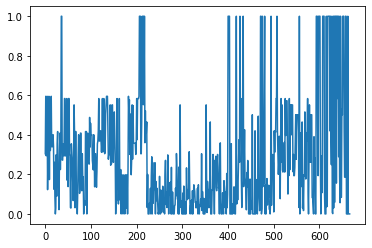

35
What is a novel coronavirus?
A novel coronavirus is a new coronavirus that has not been previously identified. The virus causing coronavirus disease 2019 (COVID-19), is not the same as thecoronaviruses that commonly circulate among humansand cause mild illness, like the common cold.A diagnosis with coronavirus 229E, NL63, OC43, or HKU1 is not the same as a COVID-19 diagnosis. Patients with COVID-19 will be evaluated and cared for differently than patients with common coronavirus diagnosis.


In [9]:
start = time.time() # time object
similarity = overall_similarity('what is covid',data_set)
end = time.time() # time object
print(end-start)
# print(similarity)
plt.plot(similarity)
plt.show()
print(np.argmax(similarity))
print(data_set.iloc[np.argmax(similarity)]['0'],data_set.iloc[np.argmax(similarity)]['1'],sep='\n')

In [17]:
for x in range(len(similarity)):
    if(similarity[x]>0.80):
        print(data_set.iloc[x]['0'])

Am I protected against COVID-19 if I got vaccinated against influenza or pneumococcus this year?
How long can the virus live on a doorknob? On cash? On my keyboard?
Since domestic cats can get infected with the virus that causes COVID-19, should I worry about my cat?
Whose food security and livelihoods are most at risk due to the pandemic?

How long does the virus survive on surfaces?
Why is providing contraception/ family planning, as well as family planning services and information, important during the COVID-19 pandemic?


In [41]:
import pickle
pickle_out = open("res02.pickle","wb")
pickle.dump(res2,pickle_out)
pickle_out.close()

In [37]:
res1 = dict(list(w2v.items())[len(w2v)//2:]) 
res2 = dict(list(w2v.items())[:len(w2v)//2]) 

In [39]:
print(len(res1))

200002


In [26]:
z = {**res1, **res2}

In [29]:
print(len(z))

400001


In [30]:
pickle_in = open('vocab.pickle','rb')
vocab = pickle.load(pickle_in)

In [33]:
print(type(check1))

<class 'dict'>
